In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/Enriched_Migration_Data.csv', low_memory=False)

In [3]:
data.describe()

,longitude,latitude,temperature,wind_speed,precipitation,solar_radiation
count,51150.000000,51150.000000,3849.00000,3849.000000,3849.000000,3849.000000
mean,22.205328,9.901698,22.34583,10.918342,0.166459,76.833357
std,10.765370,31.730240,6.70123,7.046905,0.569403,128.193225
min,-12.008952,-78.814143,2.40000,0.000000,0.000000,0.000000
25%,16.036856,-19.889085,17.60000,5.800000,0.000000,0.000000
50%,21.834815,1.604099,21.40000,9.300000,0.000000,0.000000
75%,28.938002,44.709710,27.00000,14.400000,0.000000,108.720000
max,55.399653,75.616655,43.90000,49.900000,7.600000,658.470000


In [4]:
data_cleaned = data.dropna()

In [5]:
data_cleaned.describe()

,longitude,latitude,temperature,wind_speed,precipitation,solar_radiation
count,3849.000000,3849.000000,3849.00000,3849.000000,3849.000000,3849.000000
mean,22.903000,8.970728,22.34583,10.918342,0.166459,76.833357
std,8.307207,32.837224,6.70123,7.046905,0.569403,128.193225
min,6.326104,-34.824219,2.40000,0.000000,0.000000,0.000000
25%,18.033613,-22.038615,17.60000,5.800000,0.000000,0.000000
50%,22.030967,-0.399796,21.40000,9.300000,0.000000,0.000000
75%,26.060473,49.184879,27.00000,14.400000,0.000000,108.720000
max,51.119499,59.614979,43.90000,49.900000,7.600000,658.470000


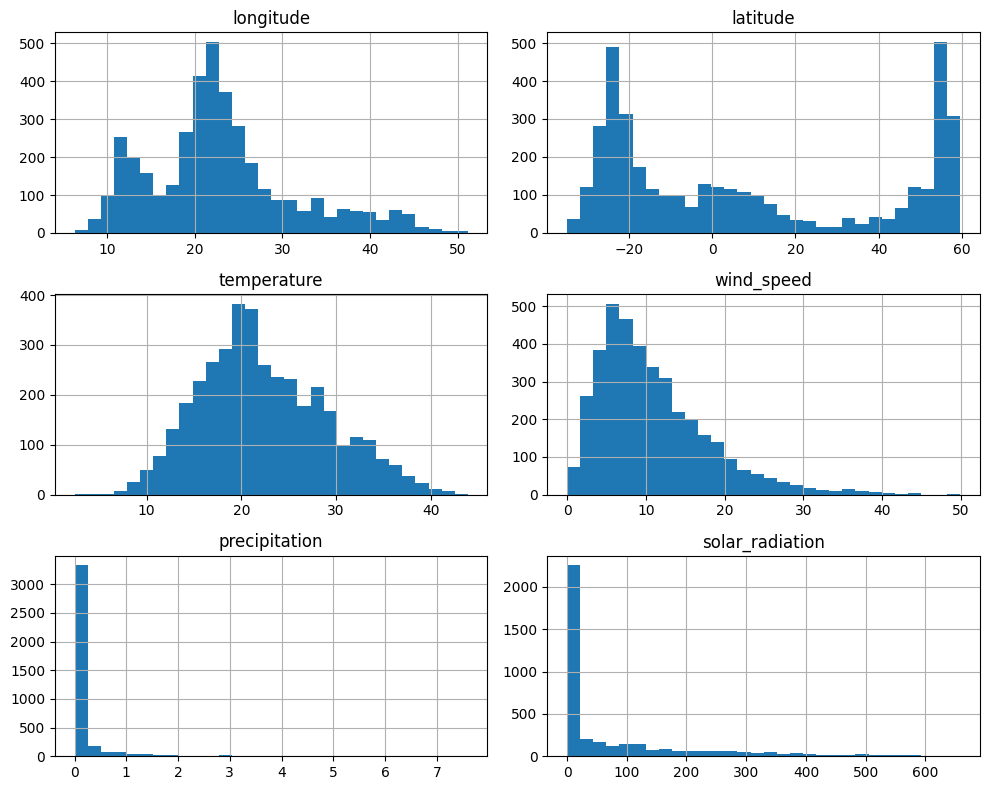

In [6]:
# Histograma para cada coluna
data_cleaned.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()


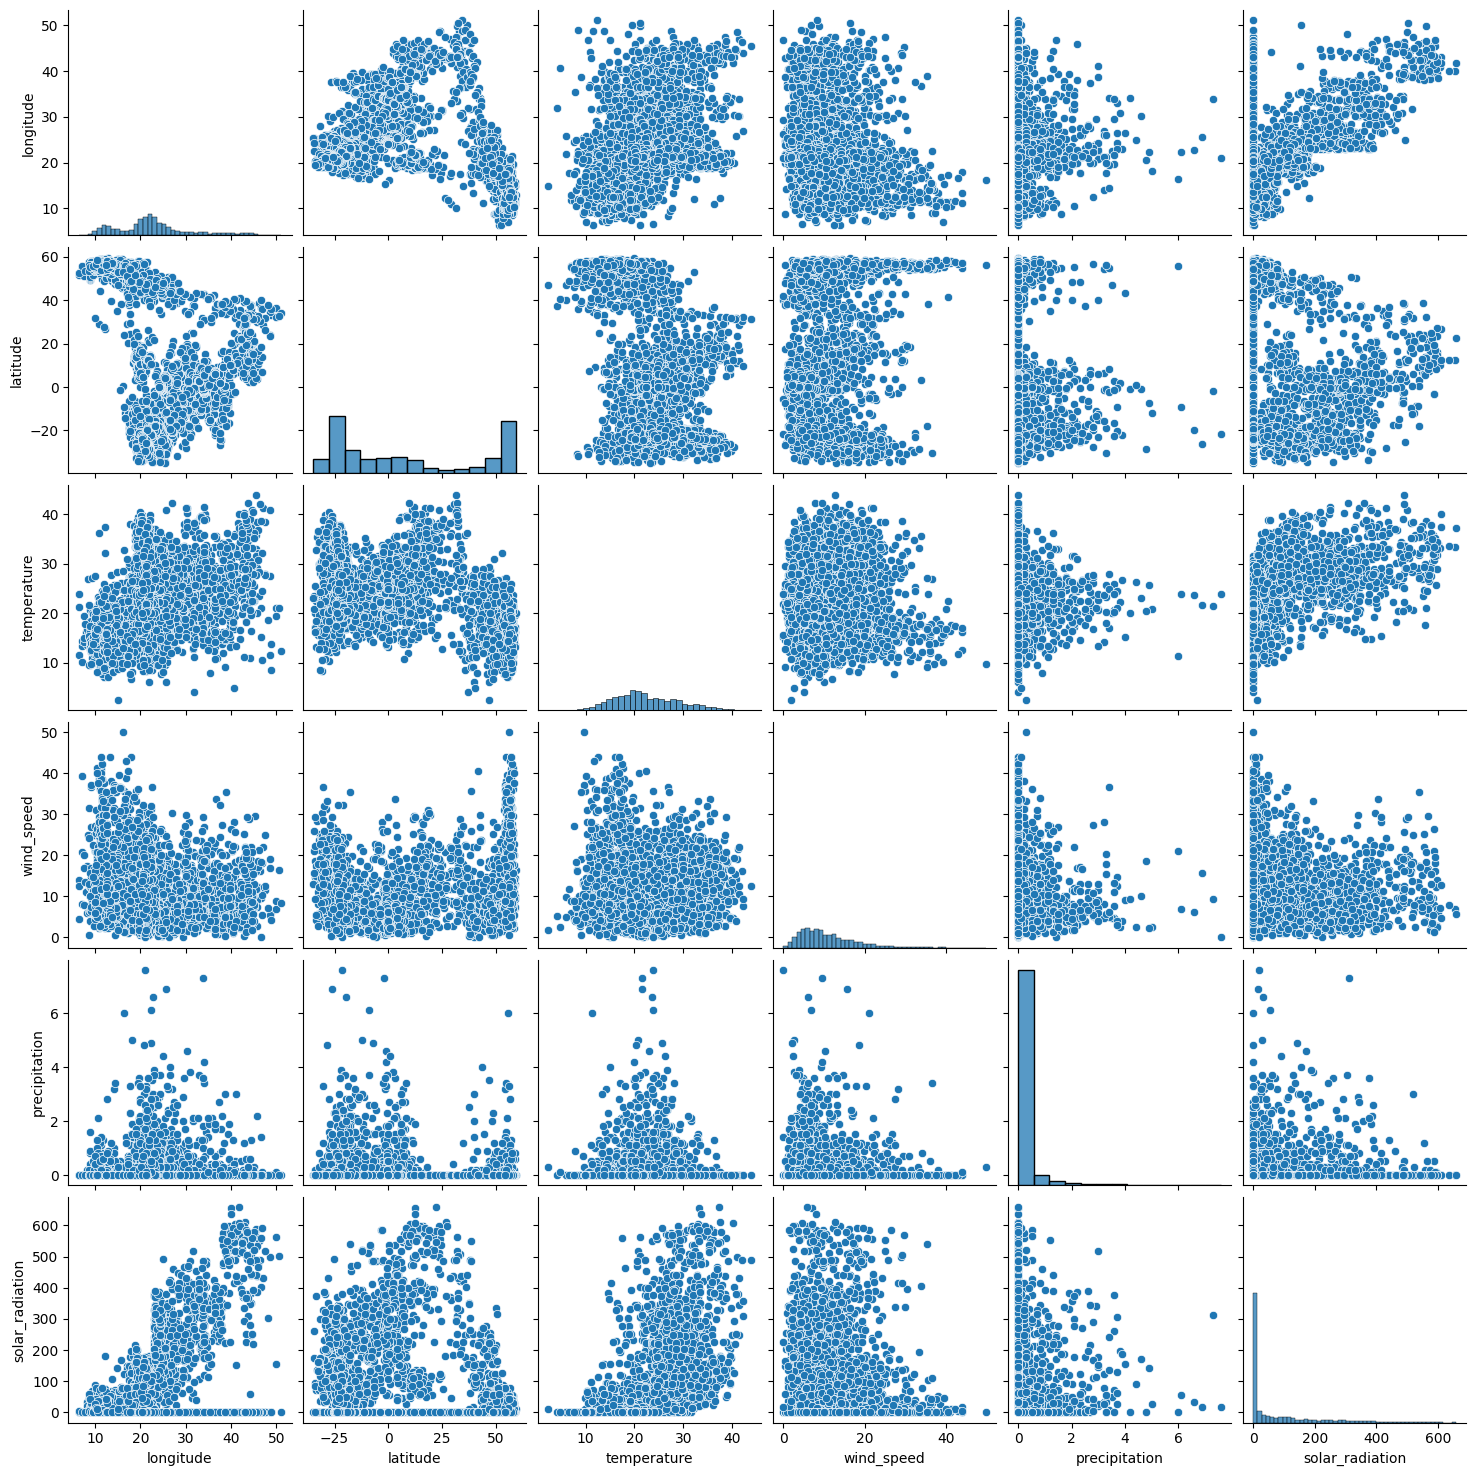

In [7]:
# Pairplot para visualizar relações entre as variáveis
sns.pairplot(data_cleaned)
plt.show()

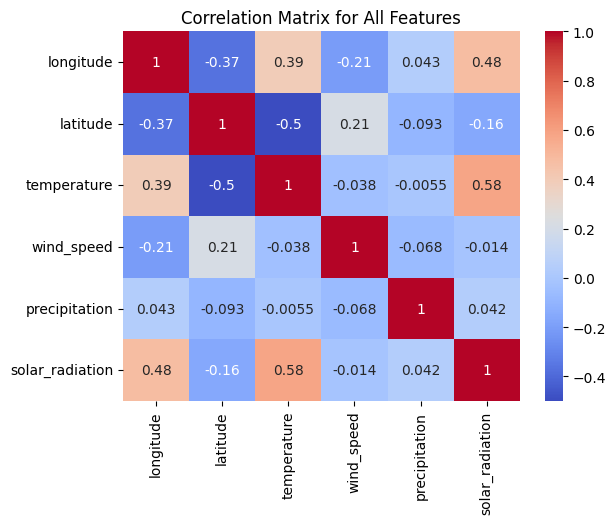

In [8]:
# Matriz de correlação para todas as features (excluindo as colunas 'timestamp' e 'bird_id')
correlation_matrix_all = data_cleaned.drop(columns=['timestamp', 'bird_id']).corr()
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for All Features')
plt.show()


C:\Users\luisg\AppData\Local\Temp\ipykernel_14520\942995674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['x'] = np.cos(np.radians(data_cleaned['latitude'])) * np.cos(np.radians(data_cleaned['longitude']))
C:\Users\luisg\AppData\Local\Temp\ipykernel_14520\942995674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['y'] = np.cos(np.radians(data_cleaned['latitude'])) * np.sin(np.radians(data_cleaned['longitude']))
C:\Users\luisg\AppData\Local\Temp\ipykernel_14520\942995674.py

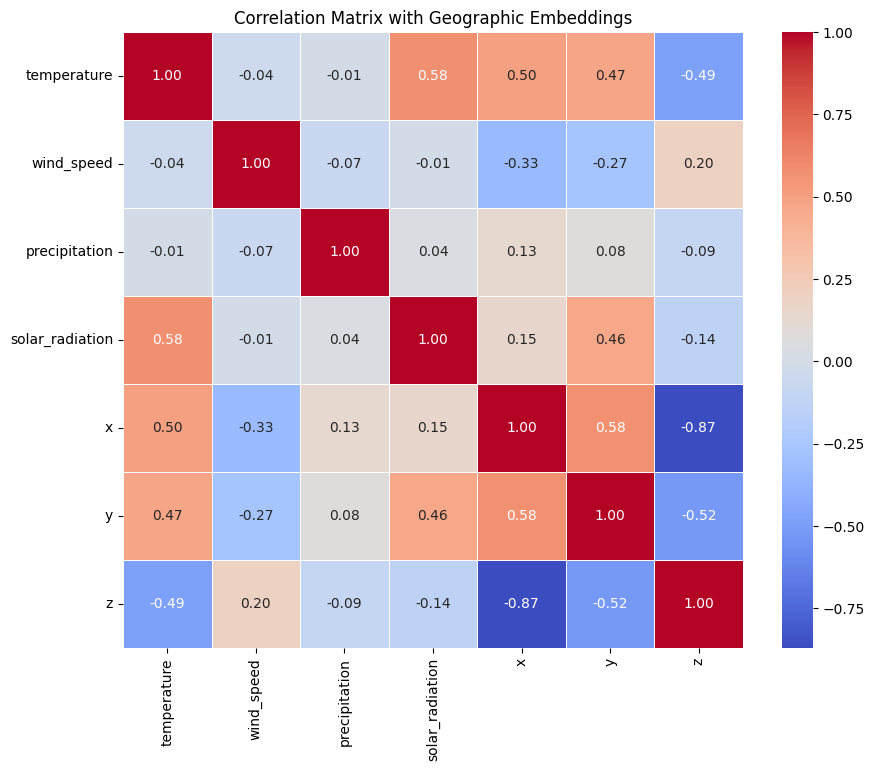

In [9]:
# Transformação trigonométrica para embeddings geográficos (Coordenadas 3D)
data_cleaned['x'] = np.cos(np.radians(data_cleaned['latitude'])) * np.cos(np.radians(data_cleaned['longitude']))
data_cleaned['y'] = np.cos(np.radians(data_cleaned['latitude'])) * np.sin(np.radians(data_cleaned['longitude']))
data_cleaned['z'] = np.sin(np.radians(data_cleaned['latitude']))

# Removendo latitude e longitude originais (para evitar redundância na correlação)
correlation_data = data_cleaned.drop(columns=['timestamp', 'bird_id', 'longitude', 'latitude'])

# Matriz de correlação
correlation_matrix_all = correlation_data.corr()

# Exibir heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix with Geographic Embeddings')
plt.show()


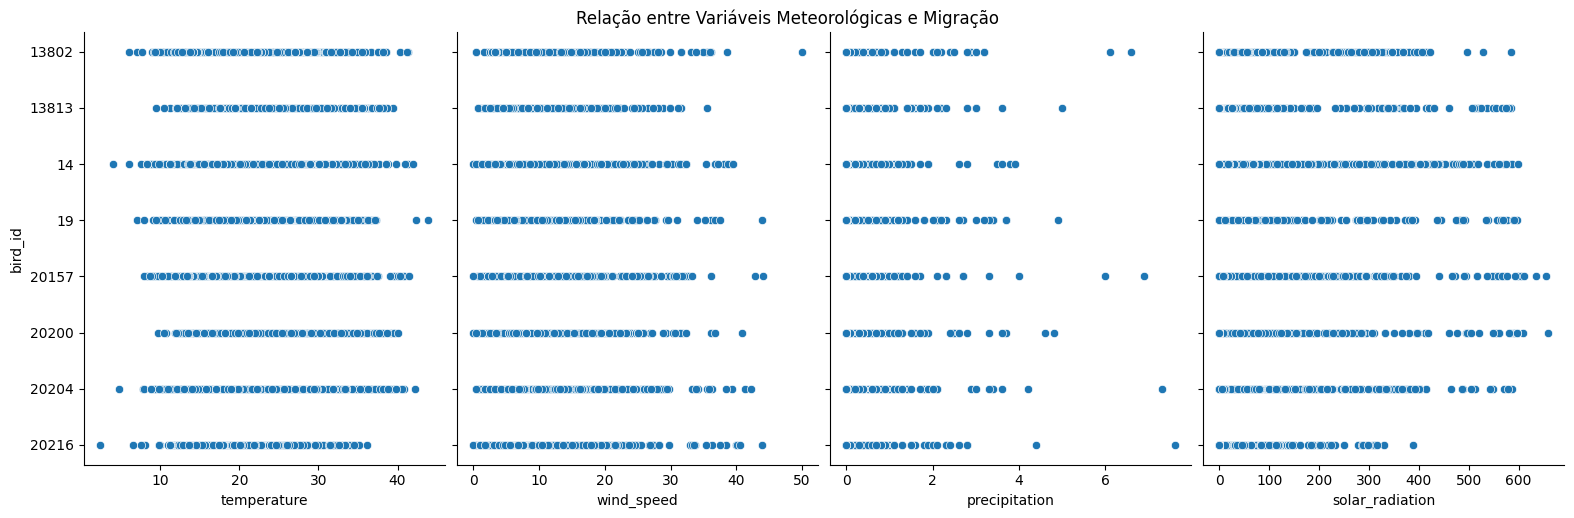

In [10]:
# Selecionar as colunas de interesse para a análise
columns_of_interest = ['temperature', 'wind_speed', 'precipitation', 'solar_radiation', 'bird_id']

# Filtrar os dados para incluir apenas as colunas de interesse
analysis_data = data_cleaned[columns_of_interest]

# Gráficos de dispersão para visualizar a relação entre variáveis meteorológicas e migração
sns.pairplot(analysis_data, x_vars=['temperature', 'wind_speed', 'precipitation', 'solar_radiation'], y_vars='bird_id', height=5, aspect=0.8, kind='scatter')
plt.suptitle('Relação entre Variáveis Meteorológicas e Migração', y=1.02)
plt.show()

In [11]:
data_cleaned

,timestamp,longitude,latitude,bird_id,temperature,wind_speed,precipitation,solar_radiation,x,y,z
0,2010-05-31 20:13:00,13.308933,57.542138,13802,13.7,11.2,0.0,11.12,0.522266,0.123544,0.843786
1,2010-06-01 01:56:00,16.202627,56.112668,13802,9.6,49.9,0.3,0.00,0.535416,0.155579,0.830136
2,2010-06-01 19:50:00,16.346812,56.101887,13802,9.9,35.6,0.0,44.72,0.535172,0.156970,0.830031
3,2010-06-02 01:55:00,12.867003,57.618315,13802,12.3,7.2,0.0,0.00,0.522109,0.119262,0.844499
4,2010-06-02 20:18:00,13.886887,57.967651,13802,16.6,2.9,0.0,13.52,0.514895,0.127299,0.847749
...,...,...,...,...,...,...,...,...,...,...,...
3844,2011-01-26 17:40:00,20.397691,-22.711778,20216,26.0,10.5,0.6,46.15,0.864617,0.321508,-0.386096
3845,2011-01-28 04:02:00,20.473615,-23.106846,20216,19.3,5.6,0.0,0.00,0.861676,0.321715,-0.392447
3846,2011-01-28 17:40:00,20.497308,-23.319118,20216,24.7,15.0,0.7,83.78,0.860175,0.321560,-0.395852
3847,2011-01-29 04:02:00,20.395051,-23.719427,20216,20.1,13.7,0.0,0.00,0.858134,0.319053,-0.402258


In [12]:
# Verificar se a coluna 'season' está no dataframe
if 'season' in data_cleaned.columns:
    # Histogramas das variáveis meteorológicas por estação
    variables = ['temperature', 'wind_speed', 'precipitation', 'solar_radiation']
    for var in variables:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data_cleaned, x=var, hue='season', multiple='stack', palette='coolwarm')
        plt.title(f'Distribuição de {var.capitalize()} por Estação')
        plt.xlabel(var.capitalize())
        plt.ylabel('Frequência')
        plt.legend(title='Estação')
        plt.show()
    
    # Boxplots das variáveis meteorológicas por estação
    for var in variables:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='season', y=var, data=data_cleaned, palette='coolwarm')
        plt.title(f'Boxplot de {var.capitalize()} por Estação')
        plt.xlabel('Estação')
        plt.ylabel(var.capitalize())
        plt.show()
else:
    print("A coluna 'season' não está presente no dataframe.")

A coluna 'season' não está presente no dataframe.
